# Pymaceuticals Inc.
---

### Analysis

- Evidently, Capomulin had the most mice to complete the study, and all other treatments had a great number of mice deaths during the study, except for Remicane. 
- After analyzing the given data, Capomulin is an effective medication to reduce tumor growth.
- In the data observed, Infubinol had one mouse that had a tumor growth reduction in the study, while the other mice showed a volume increase, proving to be an outlier in the regimen.
- Finally, there was an evident connection between mouse weight and tumor volume. This poses a possibility that mouse weight may affect the drug treatment provided.
 

In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path =  r"C:\Users\jasmi\OneDrive\Documents\module_5_hw\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\jasmi\OneDrive\Documents\module_5_hw\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
study_data_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count= len(study_data_merge["Mouse ID"].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = study_data_merge.loc[study_data_merge.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = study_data_merge.loc[study_data_merge["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = study_data_merge[study_data_merge['Mouse ID'].isin(duplicate_mouse)==False]
clean_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean_df= len(clean_study_df["Mouse ID"].unique())
total_mice_clean_df

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_reg_mean = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_reg_median = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_reg_variance = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_reg_sds = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_reg_sems = clean_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
drug_reg_summary_table = pd.DataFrame({"Mean Tumor Volume":drug_reg_mean,
                              "Median Tumor Volume":drug_reg_mean,
                              "Tumor Volume Variance":drug_reg_variance,
                              "Tumor Volume Std. Dev.":drug_reg_sds,
                              "Tumor Volume Std. Err.":drug_reg_sems})
drug_reg_summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_summary_table = clean_study_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
stats_summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

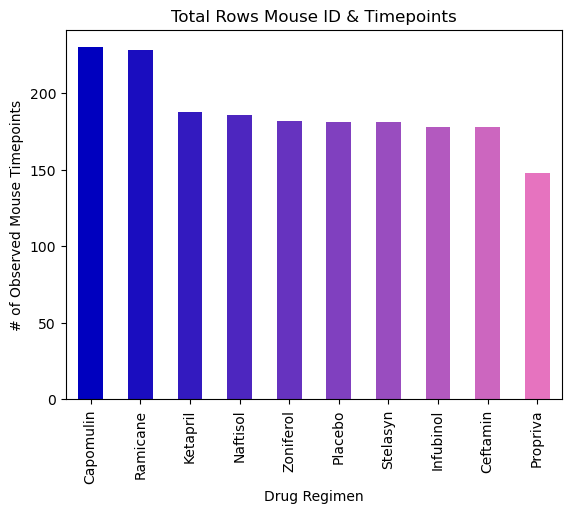

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(clean_study_df))]
counts = clean_study_df['Drug Regimen'].value_counts()
counts.plot(kind="bar", x= 'Drug Regimen', y='Timepoints',color= my_colors)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Rows Mouse ID & Timepoints")
plt.show()

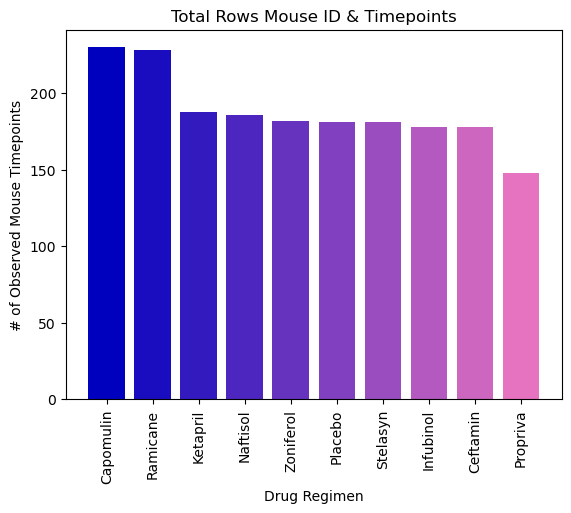

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
colors = [(x/10.0, x/20.0, 0.75) for x in range(len(clean_study_df))]

counts = clean_study_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values, color=colors)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Rows Mouse ID & Timepoints")
plt.show()

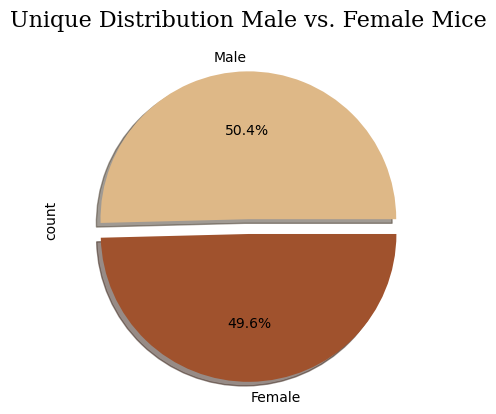

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_df = clean_study_df.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()

# Make the pie chart
colors = ['burlywood', 'sienna']
pie_title_font =  {'family': 'serif', 'color':'black', 'weight':'light', 'size': 16}
counts = unique_mice_df.Sex.value_counts()
explode = (0, 0.1) 
counts.plot(kind="pie", autopct='%1.1f%%', shadow=True, colors=colors, explode=explode)
plt.title('Unique Distribution Male vs. Female Mice', fontdict= pie_title_font)
plt.show()

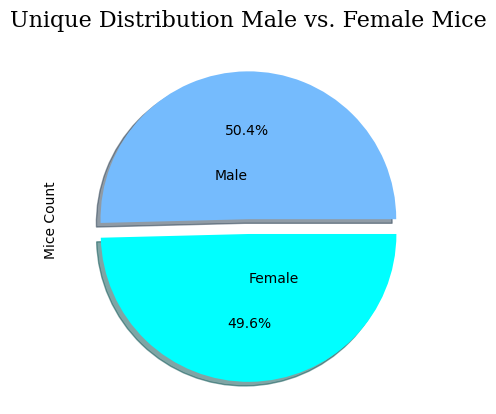

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_df = clean_study_df.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()

# Make the pie chart
counts = mice_df.Sex.value_counts()
labels= ['Male','Female']
explode = (0, 0.1)  
colors = ['xkcd:sky blue','cyan']
pie_title_font =  {'family': 'serif', 'color':'black', 'weight':'light', 'size': 16}
plt.pie(counts.values, labels=labels,labeldistance=.3, autopct='%1.1f%%', colors = colors, explode = explode, shadow = True)
plt.ylabel("Mice Count")
plt.title('Unique Distribution Male vs. Female Mice', fontdict= pie_title_font)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_volume = clean_study_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor_volume = max_tumor_volume.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumor_df = max_tumor_volume.merge(clean_study_df,on=['Mouse ID','Timepoint'],how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_tumor_df.loc[merged_tumor_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    # add subset
    tumor_vol_list.append(final_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


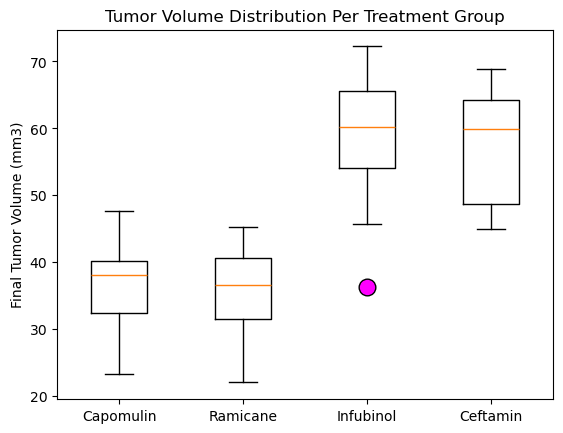

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='magenta',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume Distribution Per Treatment Group')
plt.show()

## Line and Scatter Plots

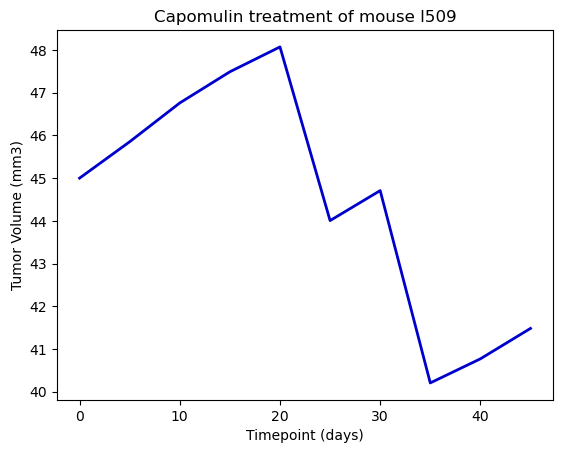

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_study_df.loc[clean_study_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'], linewidth=2, color='mediumblue')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

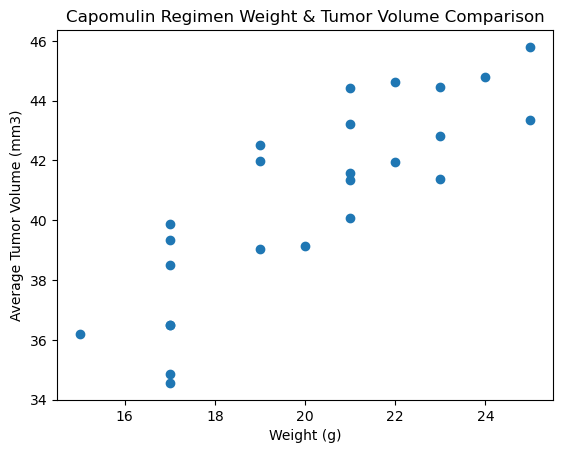

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_study_df.loc[clean_study_df['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Capomulin Regimen Weight & Tumor Volume Comparison")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


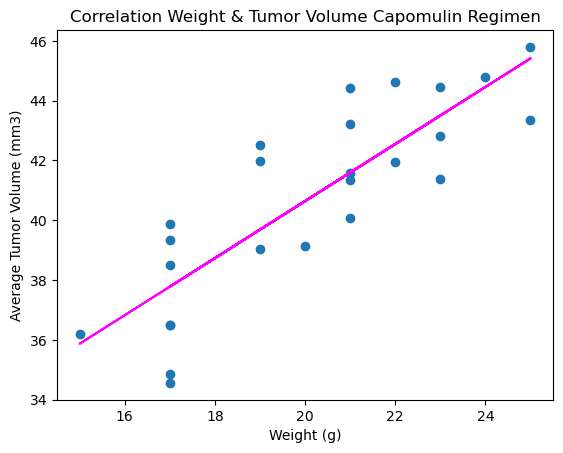

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="magenta")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Correlation Weight & Tumor Volume Capomulin Regimen")
plt.show()